In [2]:
#Better
!pip install requests BeautifulSoup4 fire

In [3]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys

import fire

In [4]:
#%%writefile ../pyscrap_url.py

def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
                       
                
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
   
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
def get_element(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url
    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
        if search:
            soup = html            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
        return res
    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_tag_elements)

##### Web scrape 100 most influential Twitter users in Africa using Python or Bash to obtain the 100 African twitter influencers. This website uses three key metrics to find the top 100 influencers a. Popularity (Retweet Influence): measured by the number of Retweets and Likes users get b. Reach (Indegree Influence): measured by the size of their audience c. Relevance (Mentions Influence): measured by the relevancy of their content 


In [5]:
res = get_elements('https://africafreak.com/100-most-influential-twitter-users-in-africa',tag='h2')
res

['100. Jeffrey Gettleman (@gettleman)',
 '99. Africa24 Media (@a24media)',
 '98. Scapegoat (@andiMakinana)',
 '97. Africa Check (@AfricaCheck)',
 '96. James Copnall (@JamesCopnall)',
 '95. Online Africa (@oafrica)',
 '94. Patrick Ngowi (@PatrickNgowi)',
 '93. DOS African Affairs (@StateAfrica)',
 '92. MoadowAJE (@Moadow)',
 '91. Brendan Boyle (@BrendanSAfrica)',
 '90. City of Tshwane (@CityTshwane)',
 '89. VISI Magazine (@VISI_Mag)',
 '88. andBeyond (@andBeyondSafari)',
 '87. This Is Africa (@ThisIsAfricaTIA)',
 '86. Sarah Carter (@sarzss)',
 '85. The EIU Africa team (@TheEIU_Africa)',
 '84. Investing In Africa (@InvestInAfrica)',
 '83. Barry Malone (@malonebarry)',
 '82. ARTsouthAFRICA (@artsouthafrica)',
 '81. Kahn Morbee (@KahnMorbee)',
 '80. Jamal Osman (@JamalMOsman)',
 '79. iamsuede™ (@iamsuede)',
 '78. Mike Stopforth (@mikestopforth)',
 '77. Equal Education (@equal_education)',
 '76. Tristan McConnell (@t_mcconnell)',
 '75. Kate Forbes (@forbeesta)',
 '74. Vanessa Raphaely (@hur

##### I extracted the twitter handles for the 100 Non-Government Influentials.

In [6]:
non_govt_influencers = res
non_govt_influencers[:5]
non_govt_influencers = pd.Series(non_govt_influencers)
user_twitter_handle = [i.split('(')[-1].strip(')') for i in non_govt_influencers]

for i in user_twitter_handle[100:]:
    user_twitter_handle.remove(i)
user_twitter_handle

['@gettleman',
 '@a24media',
 '@andiMakinana',
 '@AfricaCheck',
 '@JamesCopnall',
 '@oafrica',
 '@PatrickNgowi',
 '@StateAfrica',
 '@Moadow',
 '@BrendanSAfrica',
 '@CityTshwane',
 '@VISI_Mag',
 '@andBeyondSafari',
 '@ThisIsAfricaTIA',
 '@sarzss',
 '@TheEIU_Africa',
 '@InvestInAfrica',
 '@malonebarry',
 '@artsouthafrica',
 '@KahnMorbee',
 '@JamalMOsman',
 '@iamsuede',
 '@mikestopforth',
 '@equal_education',
 '@t_mcconnell',
 '@forbeesta',
 '@hurricanevaness',
 '@BBCKarenAllen',
 '@jaxpanik',
 '@thisisafrica',
 '@audisouthafrica',
 '@ONEinAfrica',
 '@Hamza_Africa',
 '@drewfhinshaw',
 '@africatechie',
 '@cx73',
 '@ayittey',
 '@MercedesBenz_SA',
 '@africagathering',
 '@okayafrica',
 '@mary_harper',
 '@savetherhino',
 '@africamedia_CPJ',
 '@TechCentral',
 '@GautengProvince',
 '@Aynte',
 '@daniel_howden',
 '@rangerdiaries',
 '@TheStar_news',
 '@schneiderhome',
 '@Afrinnovator',
 '@theafricareport',
 '@CityofJoburgZA',
 '@ThinkAfricaFeed',
 '@AfricaGoodNews',
 '@willintune',
 '@cnbcafrica',
 

Saved my NonGovernment Influentials Handles to a dataframe then to a csv File

---


In [18]:
from pandas import DataFrame
df_handles_nongovInfluencers = DataFrame (user_twitter_handle,columns=['Handles of Non-Government Officials'])
sorted_NonGov_Handles = df_handles_nongovInfluencers.sort_values('Handles of Non-Government Officials',ascending=False)
sorted_NonGov_Handles.to_csv(r'handles_NonGovs.csv', index=False)

##### I queried twitter to get the tweets of the Non-Government Influentials gotten above.

In [55]:
import tweepy
import csv

consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 
Tweets_NonGov_Influentials = []
    
for x in range(0, len(user_twitter_handle)):

    # The Twitter user who we want to get tweets from
    name = user_twitter_handle[x]
    try:
      # Calling the user_timeline function with our parameters
      results = api.user_timeline(id=name, count=10)

      # foreach through all tweets pulled
      for tweet in results:
      # printing the text stored inside the tweet object
          Tweets_NonGov_Influentials.append(tweet.text)
    except tweepy.TweepError as e:
        continue

from pandas import DataFrame
df_tweets_nongovInfluencers = DataFrame(Tweets_NonGov_Influentials, columns=['Tweets of Non-Government Influentials'])
df_tweets_nongovInfluencers.to_csv(r'tweets_NonGovs.csv', index=False)

##### I saved the tweets of the Non-government Influentials gotten above to a dataframe

#####  By analysing their followers count, number of likes, number of retweets, number of people they follow, number of tweets they shared, score each of the influencers and top government officials as follows: 
a. popularity_score = #retweets + #likes 

b. reach_score = #followers - #they follow 

c. relevance_score = #comments + #mentions in other tweets 


##### Analysing for Non-Government Influencers to get the followers count, likes count, following count, tweets count for each user

In [21]:
screenname_NonGov_Influentials = []
no_ofLikes_NonGov_Influentials = []
no_ofFollowing_NonGov_Influentials = []
no_ofTweetsCount_NonGov_Influentials = []
no_ofFollowers_NonGov_Influentials = []

for x in range(0, len(user_twitter_handle)):
    
    # The Twitter user who we want to get followers count for
    name = user_twitter_handle[x]
    try:
        # Calling the user_timeline function with our parameters
        results = api.get_user(id=name)
        screenname_NonGov_Influentials.append(results.screen_name)
        no_ofFollowers_NonGov_Influentials.append(results.followers_count)
        no_ofLikes_NonGov_Influentials.append(results.favourites_count)
        no_ofFollowing_NonGov_Influentials.append(results.friends_count)
        no_ofTweetsCount_NonGov_Influentials.append(results.statuses_count)
    except tweepy.TweepError as e:
        continue

from pandas import DataFrame
df_scrrenname_nongovInfluencers = DataFrame(screenname_NonGov_Influentials,columns=['Screen Name of Non-Government Influentials'])
df_followerscount_nongovInfluencers = DataFrame(no_ofFollowers_NonGov_Influentials,columns=['No Of Followers of Non-Government Influentials'])
df_likescount_nongovInfluencers = DataFrame(no_ofLikes_NonGov_Influentials,columns=['No Of Likes of Non-Government Influentials'])
df_followingcount_nongovInfluencers = DataFrame(no_ofFollowing_NonGov_Influentials,columns=['No Of Following for Non-Government Influentials'])
df_tweetscount_nongovInfluencers = DataFrame(no_ofTweetsCount_NonGov_Influentials,columns=['No Of Tweets Shared for Non-Government Influentials'])

concatenated_list = pd.concat([df_scrrenname_nongovInfluencers, df_followerscount_nongovInfluencers,df_likescount_nongovInfluencers, df_followingcount_nongovInfluencers, df_tweetscount_nongovInfluencers], axis=1)
concatenated_list

,Screen Name of Non-Government Influentials,No Of Followers of Non-Government Influentials,No Of Likes of Non-Government Influentials,No Of Following for Non-Government Influentials,No Of Tweets Shared for Non-Government Influentials
0,gettleman,25705,10,37,3773
1,a24media,31283,1623,3059,16870
2,AndiMakinana,101319,9028,2840,142253
3,AfricaCheck,68076,3916,4592,27340
4,JamesCopnall,21965,3626,5048,19439
...,...,...,...,...,...
88,Julius_S_Malema,3131739,4651,651,37220
89,News24,3579800,1143,632,323040
90,SAPresident,18,65,14,19
91,GarethCliff,1974705,34000,356,31627


In [23]:
no_ofRetweets_NonGov_Influentials = []      

#get no of retweets for each user
for x in range(0, len(user_twitter_handle)):
    name = user_twitter_handle[x]
    try:
       for status in tweepy.Cursor(api.user_timeline, id=name).items():
          if hasattr(status, "entities"):
            entities = status.entities

          #get number of retweets
          if hasattr(status, "retweet_count"):
            retweets = status.retweet_count
            if retweets is not None:
              no_ofRetweets_NonGov_Influentials.append(retweets)
    except tweepy.TweepError as e:
        continue
        
from pandas import DataFrame
df_retweetcount_nongovInfluencers = DataFrame (no_ofRetweets_NonGov_Influentials,columns=['No Of Retweets of Non-Government Influentials'])
df_retweetcount_nongovInfluencers

,No Of Retweets of Non-Government Influentials
0,3
1,713
2,8
3,11
4,8
...,...
17718,10
17719,3
17720,3
17721,2


In [30]:
no_ofMentions_NonGov_Influentials = [] 

#get no of mentions for each user
for x in range(0, len(user_twitter_handle)):
    name = user_twitter_handle[x]
    mentions_count = []
    try:
       for status in tweepy.Cursor(api.user_timeline, id=name).items():
         if hasattr(status, "entities"):
            entities = status.entities
            
         if "user_mentions" in entities:
            for ent in entities["user_mentions"]:
              if ent is not None:
                if "screen_name" in ent:
                  name = ent["screen_name"]
                  if name is not None:
                    mentions_count.append(name)
    except tweepy.TweepError as e:
        continue
        no_ofMentions_NonGov_Influentials.append(len(mentions_count))

from pandas import DataFrame
df_mentioncount_nongovInfluencers = DataFrame (no_ofMentions_NonGov_Influentials,columns=['No Of Mentions of Non-Government Influentials'])

##### To get number of retweets, popularity scores, reach scores and relevance scores for each user that is a Non-Gov Influencer

In [28]:
popularityscores_NonGov_influencers = []
reachscores_NonGov_influencers = []
relevancescores_NonGov_influencers = []

#get popularity scores for each user
#for i in range(0, len(no_ofRetweets_NonGov_Influentials)):
#   popularity_score_nongov = no_ofRetweets_NonGov_Influentials[i] + no_ofLikes_NonGov_Influentials[i]
#   popularityscores_NonGov_influencers.append(popularity_score_nongov)

#get reach scores for each user
for i in range(0, len(no_ofFollowers_NonGov_Influentials)):
    reachscore = no_ofFollowers_NonGov_Influentials[i] - no_ofFollowing_NonGov_Influentials[i]
    reachscores_NonGov_influencers.append(reachscore)

from pandas import DataFrame
df_popularityscores_nongovInfluencers = DataFrame (no_ofLikes_NonGov_Influentials,columns=['Popularity Scores for Non-Government Officials'])
df_popularityscores_nongovInfluencers.sort_values(by=['Popularity Scores for Non-Government Officials'], inplace=True, ascending=False)
df_reachscores_nongov_Influencers = DataFrame (reachscores_NonGov_influencers,columns=['Reach Scores for Non-Government Influencers'])
df_reachscores_nongov_Influencers.sort_values(by=['Reach Scores for Non-Government Influencers'], inplace=True, ascending=False)
df_relevancescores_nongov_Influencers = DataFrame(relevancescores_NonGov_influencers,columns=['Relevance Scores for Non-Government Influencers'])
df_relevancescores_nongov_Influencers.sort_values(by=['Relevance Scores for Non-Government Influencers'], inplace=True, ascending=False)

concatenated_list = pd.concat([df_scrrenname_nongovInfluencers,df_popularityscores_nongovInfluencers,df_reachscores_nongov_Influencers,df_relevancescores_nongov_Influencers], axis=1)
concatenated_list

,Screen Name of Non-Government Influentials,Popularity Scores for Non-Government Officials,Reach Scores for Non-Government Influencers,Relevance Scores for Non-Government Influencers
0,gettleman,10,25668,NaN
1,a24media,1623,28224,NaN
2,AndiMakinana,9028,98479,NaN
3,AfricaCheck,3916,63484,NaN
4,JamesCopnall,3626,16917,NaN
...,...,...,...,...
88,Julius_S_Malema,4651,3131088,NaN
89,News24,1143,3579168,NaN
90,SAPresident,65,4,NaN
91,GarethCliff,34000,1974349,NaN


### Webscraped the Government officials

In [32]:
url= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
response = get(url).content
res_gov = get_elements(response, tag='blockquote')
gov_officials_twitter_handles = []
for r in res_gov:
    split_data = r.split('— ',maxsplit=1)[1].rsplit('(',maxsplit=1)
    name = split_data[0].split(',')[0].strip()
    handle =  split_data[1].rsplit(')',maxsplit=1)[0]
    gov_officials_twitter_handles.append(handle)
    print(f'{name} : {handle}')

Eswatini Government : @EswatiniGovern1
Malawi Government : @MalawiGovt
Hage G. Geingob : @hagegeingob
Seychelles Ministry of Finance : @FinanceSC
PresidencyZA : @PresidencyZA
Ministry of Health Zambia : @mohzambia
President of Zimbabwe : @edmnangagwa
MinSantédj : @MinSantedj
Yemane G. Meskel : @hawelti
State House Kenya : @StateHouseKenya
Paul Kagame : @PaulKagame
Mohamed Farmaajo : @M_Farmaajo
H.E Hussein Abdelbagi Akol : @SouthSudanGov
Abdalla Hamdok : @SudanPMHamdok
TanzaniaSpokesperson : @TZSpokesperson
Yoweri K Museveni : @KagutaMuseveni
MOFA/MRE -(Angola) : @angola_Mirex
Amb. Willy Nyamitwe : @willynyamitwe
Chérif Mahamat Zene : @Cherif_MZ
Présidence RDC 🇨🇩 : @Presidence_RDC
Ali Bongo Ondimba : @PresidentABO
Présidence du Bénin : @PresidenceBenin
Roch KABORE : @rochkaborepf
Presidente Cabo Verde : @PresidenciaCV
Alassane Ouattara : @AOuattara_PRCI
State House of The Gambia : @Presidency_GMB
Nana Akufo-Addo : @NAkufoAddo
Pr. Alpha CONDÉ : @President_GN
Umaro Sissoco Embalo : @USEm

Extract the government officials handles only and saved to a csv file

In [39]:
from pandas import DataFrame
df_handles_govInfluencers = DataFrame (gov_officials_twitter_handles,columns=['Handles of Government Officials'])
sorted_Gov_Handles = df_handles_govInfluencers.sort_values('Handles of Government Officials',ascending=False)
sorted_Gov_Handles.to_csv(r'handles_Govs.csv', index=False)

In [58]:
import tweepy
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 
Tweets_Gov_Officials = []
    
for x in range(0, len(gov_officials_twitter_handles)):

    # The Twitter user who we want to get tweets from
    name = gov_officials_twitter_handles[x]

    # Calling the user_timeline function with our parameters
    results = api.user_timeline(id=name)

    # foreach through all tweets pulled
    for tweet in results:
    # printing the text stored inside the tweet object
        Tweets_Gov_Officials.append(tweet.text)

from pandas import DataFrame
df_tweets_govInfluencers = DataFrame (Tweets_Gov_Officials,columns=['Tweets of Government Officials'])
df_tweets_govInfluencers.to_csv(r'tweets_Govs.csv', index=False)

##### Analysing for Government Influencers to get the followers count, likes count, following count, tweets count for each user

In [41]:
screenname_Gov_Influentials = []
no_ofLikes_Gov_Influentials = []
no_ofFollowing_Gov_Influentials = []
no_ofTweetsCount_Gov_Influentials = []
no_ofFollowers_Gov_Influentials = []
no_ofRetweets_Gov_Influentials = []     
popularityscores_Gov_Influentials = []
reachscores_Gov_Influentials = []

for x in range(0, len(gov_officials_twitter_handles)):
    
    # The Twitter user who we want to get followers count for
    name = gov_officials_twitter_handles[x]
    try:
        # Calling the user_timeline function with our parameters
        results = api.get_user(id=name)
        screenname_Gov_Influentials.append(results.screen_name)
        no_ofFollowers_Gov_Influentials.append(results.followers_count)
        no_ofLikes_Gov_Influentials.append(results.favourites_count)
        no_ofFollowing_Gov_Influentials.append(results.friends_count)
        no_ofTweetsCount_Gov_Influentials.append(results.statuses_count)
    except tweepy.TweepError as e:
        continue

from pandas import DataFrame
df_screenname_govInfluencers = DataFrame(screenname_Gov_Influentials,columns=['Screen Name of NGovernment Influentials'])
df_followerscount_govInfluencers = DataFrame(no_ofFollowers_Gov_Influentials,columns=['No Of Followers of Government Influentials'])
df_likescount_govInfluencers = DataFrame(no_ofLikes_Gov_Influentials,columns=['No Of Likes of Government Influentials'])
df_followingcount_govInfluencers = DataFrame(no_ofFollowing_Gov_Influentials,columns=['No Of Following for Government Influentials'])
df_tweetscount_govInfluencers = DataFrame(no_ofTweetsCount_Gov_Influentials,columns=['No Of Tweets Shared for Government Influentials'])

concatenated_list = pd.concat([df_screenname_govInfluencers, df_followerscount_govInfluencers,df_likescount_govInfluencers, df_followingcount_govInfluencers, df_tweetscount_govInfluencers], axis=1)
concatenated_list

,Screen Name of NGovernment Influentials,No Of Followers of Government Influentials,No Of Likes of Government Influentials,No Of Following for Government Influentials,No Of Tweets Shared for Government Influentials
0,EswatiniGovern1,11337,61,82,1685
1,MalawiGovt,39389,915,26,4030
2,hagegeingob,192646,268,55,1087
3,FinanceSC,127,12,224,126
4,PresidencyZA,1600583,63,14,18884
5,mohzambia,7196,163,95,838
6,edmnangagwa,547183,65,116,628
7,MinSantedj,2936,587,127,1066
8,hawelti,66415,737,435,4722
9,StateHouseKenya,1104949,61,214,9054


##### To get number of retweets, popularity scores, reach scores and relevance scores for each user that is a Government Official

In [42]:
no_ofRetweets_Gov_Influentials = []     
popularityscores_Gov_Influentials = []
reachscores_Gov_Influentials = []
noOfMentions_Gov_Influentials = []

#get number of retweets
for x in range(0, len(gov_officials_twitter_handles)):
    name = gov_officials_twitter_handles[x]
    try:
      Retweet_count = 0
      for status in tweepy.Cursor(api.user_timeline,id=name).items():
        Retweet_count += status.retweet_count
      no_ofRetweets_Gov_Influentials.append(Retweet_count)
    except tweepy.TweepError as e:
        continue

#get popularity scores for each user
for i in range(0, len(no_ofRetweets_Gov_Influentials)):
    popularity_score_gov = no_ofRetweets_Gov_Influentials[i] + no_ofLikes_Gov_Influentials[i]
    popularityscores_Gov_Influentials.append(popularity_score_gov)

#get reach scores for each user
for i in range(0, len(no_ofFollowers_Gov_Influentials)):
    reachscore_gov = no_ofFollowers_Gov_Influentials[i] - no_ofFollowing_Gov_Influentials[i]
    reachscores_Gov_Influentials.append(reachscore_gov)

from pandas import DataFrame
#i used only number of likes to get popularity scores instead of number_of_likes + number_of_retweets because i tried but to no avail, i couldn't figure out hoe to get the number of retweets pre tweets
df_popularityscores_Gov_Influencers = DataFrame (no_ofLikes_Gov_Influentials,columns=['Popularity Scores for Government Officials'])
df_reachscores_Gov_Influencers = DataFrame (reachscores_Gov_Influentials,columns=['Reach Scores for Government Influencers'])
df_relevancecores_Gov_Influencers = DataFrame (noOfMentions_Gov_Influentials,columns=['Relevance Scores for Government Influencers'])

concatenated_list = pd.concat([df_screenname_govInfluencers, df_popularityscores_Gov_Influencers,df_reachscores_Gov_Influencers, df_relevancecores_Gov_Influencers], axis=1)
concatenated_list

,Screen Name of NGovernment Influentials,Popularity Scores for Government Officials,Reach Scores for Government Influencers,Relevance Scores for Government Influencers
0,EswatiniGovern1,61,11255,NaN
1,MalawiGovt,915,39363,NaN
2,hagegeingob,268,192591,NaN
3,FinanceSC,12,-97,NaN
4,PresidencyZA,63,1600569,NaN
5,mohzambia,163,7101,NaN
6,edmnangagwa,65,547067,NaN
7,MinSantedj,587,2809,NaN
8,hawelti,737,65980,NaN
9,StateHouseKenya,61,1104735,NaN


##### Extract the top 5 unique hashtags these influencers and government officials used in their top 10 retweets. Group them based on their top 5 hashtags similarities. 

In [59]:
combined_list = user_twitter_handle + gov_officials_twitter_handles

#get number of retweets
tweets = []

for x in range(0, len(combined_list)):
  name = combined_list[x]
  try:
      # Calling the user_timeline function with our parameters
      results = api.user_timeline(id=name, count=10)

      # foreach through all tweets pulled
      for tweet in results:
      # getting the text stored inside the tweet object
          tweets.append(tweet.text)
  except tweepy.TweepError as e:
        continue

In [60]:
import re
extracted_hashtags = re.findall(r"#(\w+)", str(tweets))
extracted_hashtags

#convert all hashtags to lowercase
hashtags = [item.lower() for item in extracted_hashtags]
str(hashtags)

"['covid19', 'yebowatchparty', 'yebowatchparty', 'kensarowiwa', 'kensarowiwa', 'yebowatchparty', 'yebowatch', 'miniquiz', 'african', 'cameroon', 'bringbackourinternet', 'kigali', 'rwanda', 'burundi', 'burundicrisis', 'leadershipgap', 'abidjan', 'entrepreneurs', 'mutukula', 'sdg', 'uhc', 'covid19', 'kenya', 'covid', 'stayathome', 'covid19insa', 'flattenthecurve', 'staysafe', 'savelives', 'tshwaneemergencynumber', 'cabletheft', 'covid19', 'playyourpart', 'covid19sa', 'gautengcovid19', 'reminderwatersupplyinterruption', 'mandeladay', 'lockdown', 'covid19', 'coronavirus', 'covid_19', 'mali', 'parliamen', 'ssa', 'malawi', 'stockexchange', 'tokens', 'dlt', 'blockchain', 'equities', 'bonds', 'd', 'art', 'artistofthemonthasa', 'artsouthafrica', 'loveofart', 'painting', 'inspiration', 'retweet', 'creativity', 'artistofthemonthasa', 'artsouthafrica', 'loveofart', 'painting', 'inspiration', 'retweet', 'creativity', 'naf16', 'best10days', 'kof2016', 'art', 'sketching', 'artsouthafrica', 'loveofart

Looking at all the hashtags generated, the unique hashtags were 'covid19', 'mandeladay', 'juneteenth', 'somalia' and 'côtedivoire'

In [61]:
# Looking at all the hashtags generated, the unique hashtags were 'covid19', 'mandeladay', 'juneteenth', 'somalia' and 'côtedivoire'

# created a list to store the counts of each government and non-government influencers
covid19 = []
mandeladay = []
somalia = []
juneteenth = []
côtedivoire = []

cricTweet = tweepy.Cursor(api.search, q='covid19').items()
for tweet in cricTweet:
   author = tweet.author
   json_file = author._json
   screen_name = json_file['screen_name']
   covid19.append(screen_name)

TweepError: ignored

In [ ]:
cdv = covid19
len(cdv)

2699

In [ ]:
cricTweet = tweepy.Cursor(api.search, q='mandeladay').items()
for tweet in cricTweet:
   author = tweet.author
   json_file = author._json
   screen_name = json_file['screen_name']
   mandeladay.append(screen_name)

TweepError: ignored

In [ ]:
cricTweet = tweepy.Cursor(api.search, q='juneteenth').items()
for tweet in cricTweet:
   author = tweet.author
   json_file = author._json
   screen_name = json_file['screen_name']
   juneteenth.append(screen_name)

TweepError: ignored

In [ ]:
cricTweet = tweepy.Cursor(api.search, q='somalia').items()
for tweet in cricTweet:
   author = tweet.author
   json_file = author._json
   screen_name = json_file['screen_name']
   somalia.append(screen_name)

In [ ]:
cricTweet = tweepy.Cursor(api.search, q='côtedivoire').items()
for tweet in cricTweet:
   author = tweet.author
   json_file = author._json
   screen_name = json_file['screen_name']
   côtedivoire.append(screen_name)

TweepError: ignored

In [ ]:
covid19

['ElBlogdePorter',
 'uyohan',
 'jiangyin',
 'nicoaguila',
 'caedka1',
 'steferResist',
 'strong_sue',
 'caleido12',
 'okala21',
 'hmtsite']

In [ ]:
len(covid19)

10

Make a bar plot to show the fraction of influencers and top government officials by 
hashtag


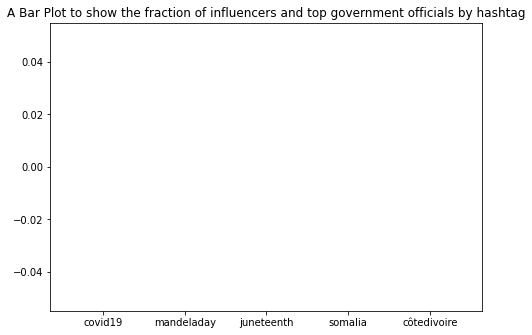

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
hashtag = ['covid19', 'mandeladay', 'juneteenth', 'somalia', 'côtedivoire']
governmenInfluencers = [len(covid19),len(mandeladay),len(juneteenth),len(somalia),len(côtedivoire)]
10,
ax.bar(hashtag,governmenInfluencers)
plt.title("A Bar Plot to show the fraction of influencers and top government officials by hashtag")
plt.show()